<a href="https://colab.research.google.com/github/miladxo/Machine-Learning-Project/blob/main/Sentiment_analysis_of_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install dependencies

In [12]:
!pip install -q transformers tweepy wordcloud matplotlib
!pip3 install emoji==0.6.0


# Twitter API credentials



In [2]:
import tweepy

# Add Twitter API key and secret
consumer_key = "WgddDBIcwgsTEDvOfZNuHX8Tj"
consumer_secret = "THgWliQ5WjEBqeNdem95fWQmlmZoEgeDSRuYtfnvID8I1WzaGl"

# Handling authentication with Twitter
auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)

# Create a wrapper for the Twitter API
api = tweepy.API(auth, wait_on_rate_limit=True)

# Search for tweets using Tweepy

In [3]:
# Helper function for handling pagination in our search and handle rate limits
def limit_handled(cursor):
    while True:
        try:
            yield cursor.next()
        except tweepy.RateLimitError:
            print('Reached rate limite. Sleeping for >15 minutes')
            time.sleep(15 * 61)
        except StopIteration:
            break

# Define the term we will be using for searching tweets
query = '#NFTs'
query = query + ' -filter:retweets'

# Define how many tweets to get from the Twitter API
count = 1000

# Let's search for tweets using Tweepy
search = limit_handled(tweepy.Cursor(api.search_tweets,
                        q=query,
                        tweet_mode='extended',
                        lang='en',
                        result_type="recent").items(count))


# Run sentiment analysis on the tweets (test)

In [14]:
tweet = 'bad content! unsubscribed 😉'
from transformers import pipeline
# Set up the inference pipeline using a model from the 🤗 Hub
sentiment_analysis = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")
sentiment = sentiment_analysis(tweet)
print(sentiment)

[{'label': 'NEG', 'score': 0.9811022877693176}]


# import Dataset from kaggle

In [4]:

#  IMPORT  KAGGLE DATA SOURCES TO THE CORRECT LOCATION (/kaggle/input) IN  NOTEBOOK,

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'twitter-entity-sentiment-analysis:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1520310%2F2510329%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240204%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240204T104659Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D829614b2ebfc3bfa73e40371c5df17b00d55389ad656407d8c4601bd0ee47c667a0b2c6db448b0137b48ea8f1c8cfee924e71d4d0705f2daab5622b1f9b35755a75b8cf1b1da4dfe5de76cc663d186e3e87db63f07cd455512dfa2445ee74515248f14a25381a39b70e9be16f79a33dc2b94a4c193f8aa287f3f3425deda70db3b9d7a2d81fd0a9c0a38fdbc6a5efd433661b263c9152816d044af67f6d492ccd47cbb4bc3dd941216573dd2a53563370eeafeb6893b0c93c2475c32eea582329fea4829db4b2aeb2f741d33b626d75aade4b0648d7cf7b80762879b40f75215d0fa29ccda94572d0e7deda9f6db0b4fe0c63386c0e5619ff24f62c6a09fb583'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 2090169 bytes downloaded
Downloaded and uncompressed: twitter-entity-sentiment-analysis
Data source import complete.


# kaggle directory

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv
/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv


# Define Dataframe train and test datasets

In [6]:
df_training = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv', header=None, names=['Tweet ID', 'entity', 'sentiment', 'Tweet content'])
df_validation = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv', header=None, names=['Tweet ID', 'entity', 'sentiment', 'Tweet content'])
df_validation.head()
df_training.head()

,Tweet ID,entity,sentiment,Tweet content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


# Model Configuration and Run sentiment analysis on the dataset



In [67]:
from transformers import pipeline
# Set up the inference pipeline using the model
sentiment_analysis = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")
print(sentiment_analysis.model.config)
# Let's run the sentiment analysis on each tweet
tweets = []

for tweet in df_validation["Tweet content"].values.tolist():
      content = tweet[:256]
      sentiment = sentiment_analysis(content)
      tweets.append({'tweet': content, 'sentiment': sentiment[0]['label']})


RobertaConfig {
  "_name_or_path": "finiteautomata/bertweet-base-sentiment-analysis",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "NEG",
    "1": "NEU",
    "2": "POS"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "NEG": 0,
    "NEU": 1,
    "POS": 2
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 130,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "tokenizer_class": "BertweetTokenizer",
  "torch_dtype": "float32",
  "transformers_version": "4.35.2",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 64001
}



# Explore the results of sentiment analysis

In [69]:
import pandas as pd

# Load the data in a dataframe
pd.set_option('max_colwidth', None)
pd.set_option('display.width', 3000)
df = pd.DataFrame(tweets)
print(df.head())
# Show a tweet for each sentiment
display(df[df["sentiment"] == "POS"].head(1))
display(df[df["sentiment"] == "NEU"].head(1))
display(df[df["sentiment"] == "NEG"].head(1))

                                                                                                                                                                                                                                                tweet sentiment
0  I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣       NEG
1                                                                                                                                       BBC News - Amazon boss Jeff Bezos rejects claims company acted like a 'drug dealer' bbc.co.uk/news/av/busine…       NEU
2                                                                                                                                                         @Microsoft Why do I pay for WORD when it functions so poorly on my @SamsungUS 

,tweet,sentiment
6,Thank you @EAMaddenNFL!! \n\nNew TE Austin Hooper in the ORANGE & BROWN!! \n\n#Browns | @AustinHooper18 \n\n pic.twitter.com/GRg4xzFKOn,POS


,tweet,sentiment
1,BBC News - Amazon boss Jeff Bezos rejects claims company acted like a 'drug dealer' bbc.co.uk/news/av/busine…,NEU


,tweet,sentiment
0,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣",NEG


# visualization

sentiment
NEG    409
NEU    166
POS    425
dtype: int64


<Axes: >

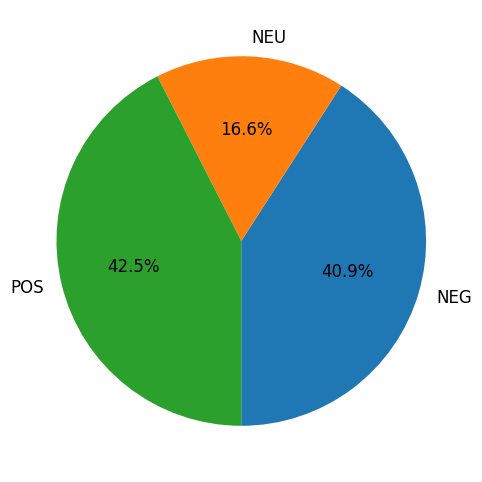

In [70]:
import matplotlib.pyplot as plt

# Let's count the number of tweets by sentiments
sentiment_counts = df.groupby(['sentiment']).size()
print(sentiment_counts)


# visualize the sentiments
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")

#wordclaud

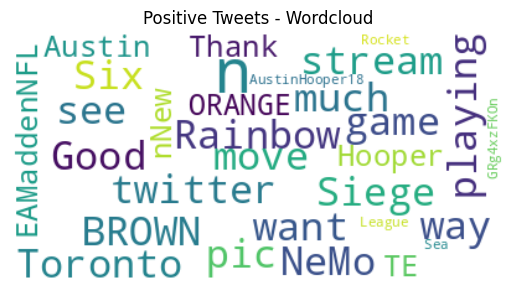

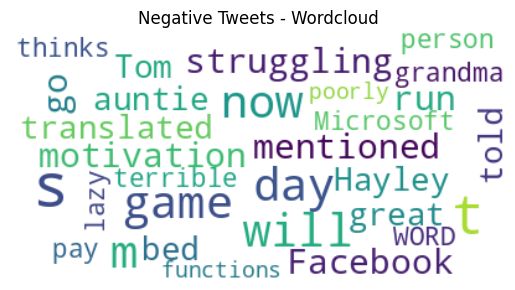

In [71]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

# Wordcloud with positive tweets
positive_tweets = df['tweet'][df["sentiment"] == 'POS']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=30, background_color="white", stopwords = stop_words).generate(str(positive_tweets))
plt.figure()
plt.title("Positive Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Wordcloud with negative tweets
negative_tweets = df['tweet'][df["sentiment"] == 'NEG']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
negative_wordcloud = WordCloud(max_font_size=50, max_words=30, background_color="white", stopwords = stop_words).generate(str(negative_tweets))
plt.figure()
plt.title("Negative Tweets - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()